In [228]:
from datasets import load_dataset, Audio
from IPython import display
import torch
import torchaudio
import matplotlib.pyplot as plt
import scipy as sp
from transformers import EncodecModel, AutoProcessor

In [25]:
dataset = load_dataset("danjacobellis/MYRiAD_V2",split='train[-20:]')
dataset = dataset.with_format("torch")
x = dataset[0]['acoustic']
x = x.to(torch.float).numpy()

Resolving data files:   0%|          | 0/34 [00:00<?, ?it/s]

In [36]:
for channel in range(12):
    display.display(display.Audio(x[channel],rate=48000))

(-0.02, 0.02)

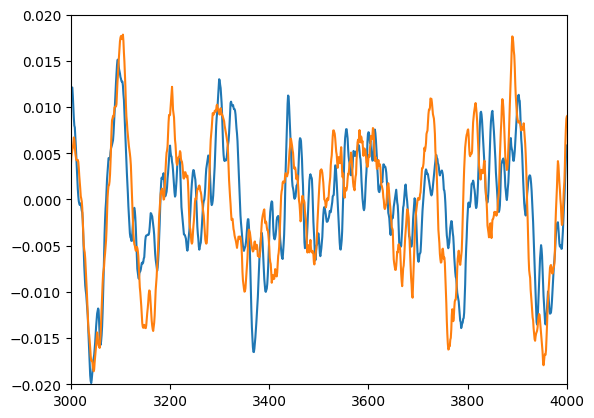

In [215]:
for channel in range(2):
    plt.plot(x[channel])
plt.xlim([3000,4000]);
plt.ylim([-0.02,0.02])

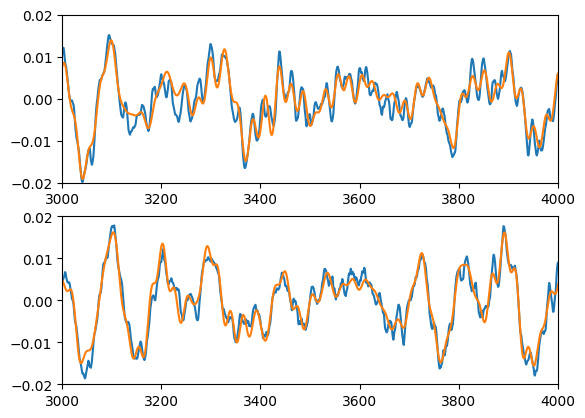

In [221]:
x0 = torch.unsqueeze(torch.tensor(x[0]),dim=0)
x1 = torch.unsqueeze(torch.tensor(x[1]),dim=0)
torchaudio.save
torchaudio.save('tmp.mp3',torch.cat([x0,x1]),sample_rate=48000,compression=8)
y = torchaudio.load('tmp.mp3')[0].numpy()
for channel in range(2):
    plt.subplot(2,1,channel+1)
    r = torch.tensor(sp.signal.correlate(x[channel],y[channel]))
    offset = y[channel].shape[0] - r.argmax() - 1
    plt.plot(x[channel])
    plt.plot(y[channel][offset:])
    plt.xlim([3000,4000])
    plt.ylim([-0.02,0.02])

In [229]:
model = EncodecModel.from_pretrained("facebook/encodec_48khz")
processor = AutoProcessor.from_pretrained("facebook/encodec_48khz")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [231]:
x.shape

(12, 65536)

In [234]:
audio_sample = x[0:2]
inputs = processor(raw_audio=audio_sample, sampling_rate=processor.sampling_rate, return_tensors="pt")
encoder_outputs = model.encode(inputs["input_values"], inputs["padding_mask"])
audio_values = model.decode(encoder_outputs.audio_codes, encoder_outputs.audio_scales, inputs["padding_mask"])[0]
audio_values = model(inputs["input_values"], inputs["padding_mask"]).audio_values
y = audio_values[0].detach().numpy()

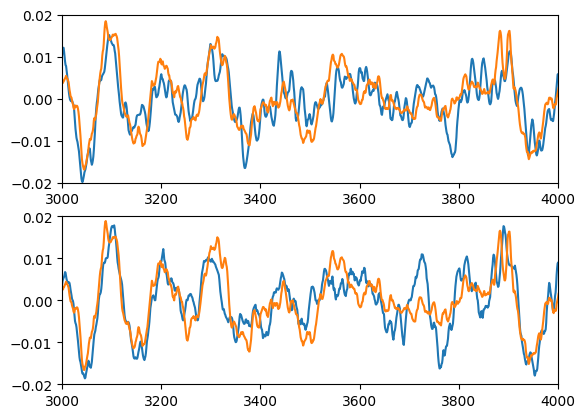

In [263]:
for channel in range(2):
    plt.subplot(2,1,channel+1)
    r = torch.tensor(sp.signal.correlate(x[channel],y[channel]))
    offset = y[channel].shape[0] - r.argmax() - 1
    plt.plot(x[channel])
    plt.plot(y[channel][offset:])
    plt.xlim([3000,4000])
    plt.ylim([-0.02,0.02])

(3000.0, 4000.0)

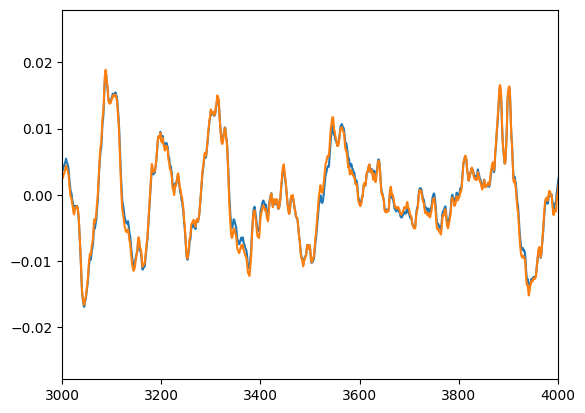

In [266]:
plt.plot(y[0])
plt.plot(y[1])
plt.xlim([3000,4000])